# How Intake & Outcome Type Differ Between Cats and Dogs at the Sonoma Animal Shelter


#### 03/21/2024
By: Stephen Gerloff, Diego Valdez, Luis Edeza

## Introduction

Within our project, we want to see if intake type has an effect on the outcome type of an animal that enters the shelter. For our first question, we wanted to see if there is a significant difference between intake and outcome types between cats and dogs. For our second question, we wanted to compare the outcome types between dogs and cats that come in as strays, and those that don't come in as strays to observe if strays have a largely different outcome type. Finally, we wanted to see if there were any major differences between all intake types except for strays for each species to see if there are any connections.

The data used for our project is from the Sonoma County animal shelter, and the data ranges from 2013 - 2024. Their data is collected when stray animals of different species in Sonoma County are entered into the shelter. There are also animals that are surrendered, confiscated from previous owners, or transferred from other shelters which is also added to the data. The data consists of records regarding the animals health information, the dates the animal was brought into the facility/released, and how they entered and left the shelter, which are the most important variables for this report.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Data Exploration

In order to answer this question, the dataset has to be imported from the Sonoma Animal Shelter. A summary of the variables that are present has been included.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-march-2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27296 entries, 0 to 27295
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  20158 non-null  object 
 1   Type                  27296 non-null  object 
 2   Breed                 27296 non-null  object 
 3   Color                 27296 non-null  object 
 4   Sex                   27296 non-null  object 
 5   Size                  27260 non-null  object 
 6   Date Of Birth         20589 non-null  object 
 7   Impound Number        27296 non-null  object 
 8   Kennel Number         27286 non-null  object 
 9   Animal ID             27296 non-null  object 
 10  Intake Date           27296 non-null  object 
 11  Outcome Date          27133 non-null  object 
 12  Days in Shelter       27296 non-null  int64  
 13  Intake Type           27296 non-null  object 
 14  Intake Subtype        27296 non-null  object 
 15  Outcome Type       

There are a total of 27,296 rows and 24 variables with most of them being categorical. However, a couple variables are integers ("Days in Shelter" and "Count") while the "Outcome Zip Code" variable is a float. Additionally, there are many variables that are missing values, such as "Name", "Date of Birth", and "Location".

To get a good look at the data, here is a set of ten random rows from the dataset.

In [ ]:
df.sample(10)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
17845,*HENNY PENNY,OTHER,BARRED ROCK,BLACK/WHITE,Female,SMALL,08/18/2015,K15-017187,SAL,A331018,...,FIELD,ADOPTION,REFERRAL,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,85623.0,"85623(32.6090462, -110.7819319)",1
3080,NaN,DOG,CHINESE SHARPEI,TAN,Female,MED,07/05/2007,K15-014768,TRUCK,A323990,...,FIELD,EUTHANIZE,INJ SEVERE,TREATABLE/MANAGEABLE,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
20239,NaN,CAT,DOMESTIC SH,BLACK,Spayed,SMALL,NaN,K15-013667,CS06,A321029,...,COMM CAT,RETURN TO OWNER,COMMCAT,HEALTHY,HEALTHY,COUNTY,COUNTY,95448.0,"95448(38.613965, -122.869825)",1
15261,CLAUDIA,DOG,ALASK MALAMUTE/MIX,BLACK/TAN,Spayed,MED,02/07/2012,K15-012718,TRUCK,A316589,...,FIELD,RETURN TO OWNER,FLD_MCHIP,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",1
9446,BODHI,DOG,LHASA APSO/MIX,BROWN/WHITE,Neutered,SMALL,02/01/2010,K17-024158,DS90,A354537,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,TREATABLE/REHAB,TREATABLE/REHAB,COUNTY,COUNTY,95436.0,"95436(38.47872, -122.890155)",1
25700,PEANUT,DOG,CHIHUAHUA SH,TAN,Male,SMALL,NaN,K16-018273,DS90,A335052,...,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY,*WINDSOR,OUT OF COUNTY,95423.0,"95423(39.0233804, -122.6701214)",1
21628,TAYLOR,DOG,CHIHUAHUA SH,BROWN,Spayed,TOY,04/11/2015,K15-015229,DA06,A324874,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95419.0,"95419(38.4256952, -122.9622732)",1
16737,*YETI,DOG,GREAT PYRENEES,WHITE,Neutered,LARGE,12/15/2017,K19-031150,DA06,A381938,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,HEALTHY,SANTA ROSA,*ROHNERT PARK,94928.0,"94928(38.3499842, -122.6928413)",1
14291,TIMBER,DOG,AUST CATTLE DOG,BLUE,Male,MED,01/23/2017,K18-027062,DS69,A367677,...,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95421.0,"95421(38.5325498, -123.0878063)",1
10220,NaN,DOG,DACHSHUND,BLACK/TAN,Female,TOY,NaN,K19-032142,DS91,A386804,...,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.46382, -122.67058)",1


There are lots of variables within this data set, but the focus is on "Intake Type" and "Outcome Type", so here is a look at how common each value of these variables are.

In [ ]:
df['Intake Type'].value_counts(normalize = True).round(4)

STRAY              0.7285
OWNER SURRENDER    0.1205
CONFISCATE         0.0837
QUARANTINE         0.0332
ADOPTION RETURN    0.0169
TRANSFER           0.0158
BORN HERE          0.0014
Name: Intake Type, dtype: float64

In [ ]:
df['Outcome Type'].value_counts(normalize = True).round(4)

RETURN TO OWNER    0.3358
ADOPTION           0.2955
TRANSFER           0.2126
EUTHANIZE          0.1380
DISPOSAL           0.0088
DIED               0.0066
RTOS               0.0020
ESCAPED/STOLEN     0.0006
VET                0.0001
Name: Outcome Type, dtype: float64

Here is a visualization of the raw data for intake type for each type of animal.

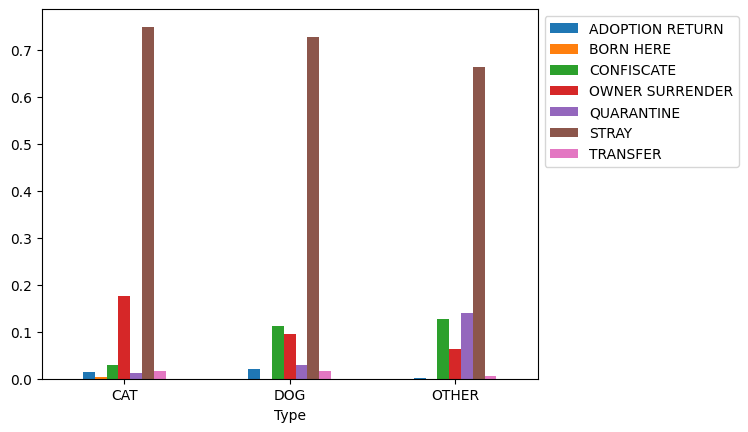

In [ ]:
pd.crosstab(df['Type'], df['Intake Type'], normalize = 'index').plot.bar(rot = 0)
plt.legend( bbox_to_anchor = (1,1));

A large majority of the animals within this data set were found as strays, with only the "OTHER" type of animal not being comprised of over 70% strays.

Since strays make up such a large amount of the intake type variable, what would this plot look like if we don't include this value?

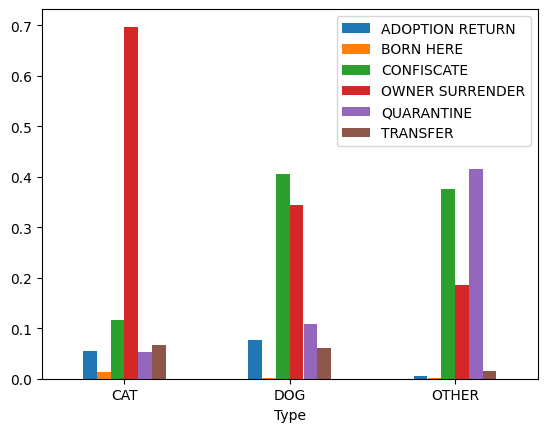

In [ ]:
(pd.crosstab(df['Type'], df[df['Intake Type'] != "STRAY"]['Intake Type'], normalize = 'index')).plot.bar(rot = 0)
plt.legend( bbox_to_anchor = (1,1));

When strays are not present, cats are seen to be surrendered almost 70% of the time, dogs and other are seen to be confiscated at a similar percentage, while other animals are also seen to be taken into quarantine at a higher rate than the other animals.

Here is a look at how the raw outcome type data relates to each type of animal.

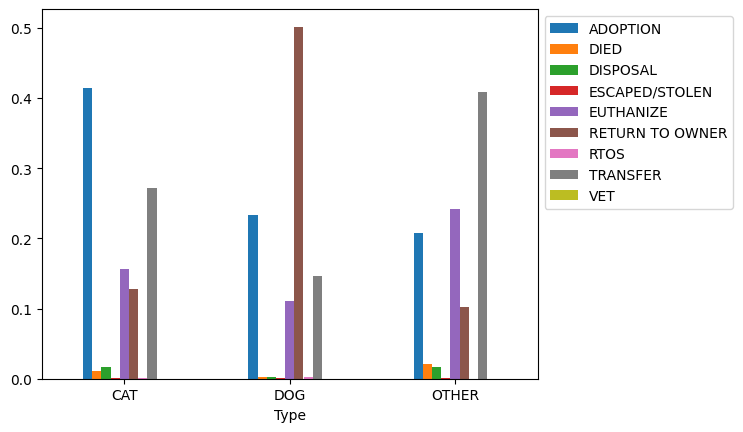

In [ ]:
pd.crosstab(df['Type'], df['Outcome Type'], normalize = 'index').plot.bar(rot = 0)
plt.legend( bbox_to_anchor = (1,1));

Each animal has a different dominant outcome type, with cats being adopted the most, dogs being returned to their owner the most, and with other animals being transferred the most.

Although these plots can be useful, they contain unclean data and many outcome types that are unnecessary due to having little presence.

## Data preprocessing

How many NA values are present in each variable?

In [ ]:
df.isna().sum()

Name                    7138
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      36
Date Of Birth           6707
Impound Number             0
Kennel Number             10
Animal ID                  0
Intake Date                0
Outcome Date             163
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             169
Outcome Subtype          499
Intake Condition           0
Outcome Condition        523
Intake Jurisdiction        0
Outcome Jurisdiction    3864
Outcome Zip Code        3894
Location                3894
Count                      0
dtype: int64

Many variables have thousands of NA values. However, many of these variables aren't specfic to the focus of this report, so they are free to be dropped.

In [ ]:
df = df.drop(["Date Of Birth","Kennel Number", "Animal ID", "Intake Date", "Outcome Date", "Outcome Zip Code", "Location", "Impound Number", "Outcome Jurisdiction", "Name", "Location", "Count", "Impound Number", 'Color', 'Sex', 'Size', 'Intake Subtype', 'Outcome Subtype', 'Intake Condition', 'Outcome Condition'], axis = 1)

Since the focus of this report is on intake and outcome type relating to cats and dogs, we only keep these variables with a couple other in order to remove most of the bloat from the data set.

In [ ]:
df = df[df['Type'].str.contains("OTHER") == False]

Cats and dogs are the focus of this report, so any rows that have the "OTHER" value for the "Type" variable are removed.

In [ ]:
df.columns = ['type', 'breed','days_in_shelter', 'intake_type', 'outcome_type', 'intake_jurisdiction']

The columns have also been renamed to remove capital letters and spaces.

In [ ]:
df['stray'] = (df['intake_type'] == 'STRAY').astype('str')
df['stray'].replace({'True':'STRAY', 'False':'NOT STRAY'}, inplace = True)

A new variable "stray" was created to indicate whether or not the animal came in to the shelter as a stray.

In [ ]:
InOther = df['intake_type'].value_counts()[4:].index.tolist()
df['intake_type'].replace(InOther, 'OTHER', inplace = True)

OutOther = df['outcome_type'].value_counts()[4:].index.tolist()
df['outcome_type'].replace(OutOther, 'OTHER', inplace = True)

Only the four most common values for the intake and outcome type variables have been kept, with the rest of the values being changed into a value called "OTHER".

In [ ]:
df = df.dropna()

Any other rows that contain NA values with this altered dataset have been dropped.

In [ ]:
df_cat = df[df['type'] == "CAT"]
df_dog = df[df['type'] == "DOG"]

The dataset was split into two others, df_cat and df_dog that only contain the rows with cat or dog data respectively.

## Data exploration and visualization

How does intake type compare between cats and dogs that enter the shelter?

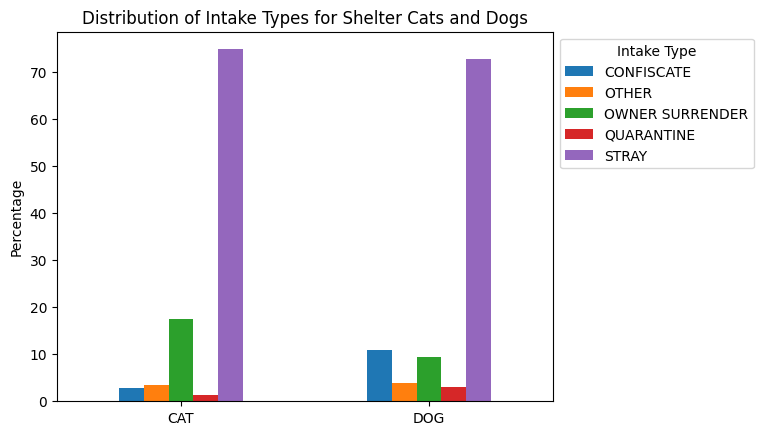

In [ ]:
(pd.crosstab(df['type'], df['intake_type'], normalize = 'index')*100).plot.bar(rot = 0)
plt.title('Distribution of Intake Types for Shelter Cats and Dogs')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title = "Intake Type", bbox_to_anchor = (1,1));

Even after the data have been cleaned, an overwhelming amount of both species (over 70% for each) enter the shelter as strays. However, cats are more likely to be surrendered by their owner while dogs are more likely to be confiscated when the two species are compared to each other.

How does outcome type compare between cats and dogs that leave the shelter?

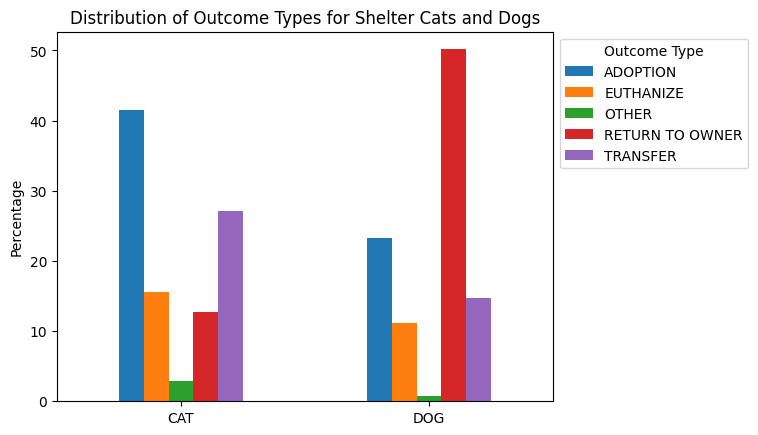

In [ ]:
(pd.crosstab(df['type'], df['outcome_type'], normalize = 'index')*100).plot.bar(rot = 0)
plt.title('Distribution of Outcome Types for Shelter Cats and Dogs')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title = "Outcome Type", bbox_to_anchor = (1,1));

A majority of cats the leave the shelter leave through adoption and transfer, while dogs are most likely to leave the shelter by being returned to their owner.

Since both such a large amount of cats and dogs enter the shelter as strays, what are the most common outcome types for cats that enter as strays and not as strays?

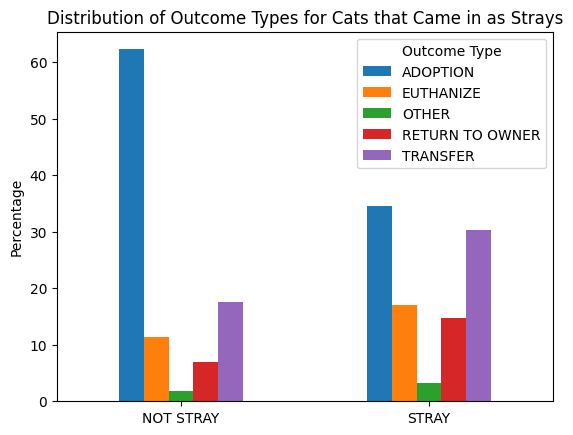

In [ ]:
(pd.crosstab(df_cat['stray'], df_cat['outcome_type'], normalize = 'index')*100).plot.bar(rot = 0)
plt.title('Distribution of Outcome Types for Cats that Came in as Strays')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title = "Outcome Type", bbox_to_anchor = (1,1));

Cats that enter the shelter as everything other than a stray have a high likelihood of being adopted, while stray cats have a slightly high chance of being adopted or being transferred.

What are the most common outcome types for dogs that enter the shelter as strays and not as strays?

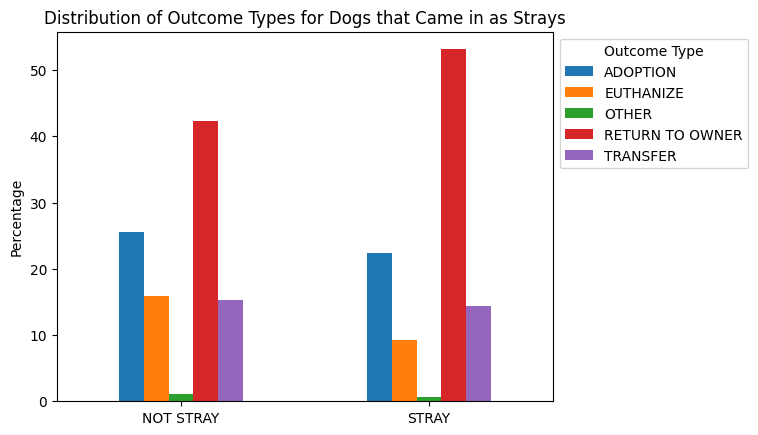

In [ ]:
(pd.crosstab(df_dog['stray'], df_dog['outcome_type'], normalize = 'index')*100).plot.bar(rot = 0)
plt.title('Distribution of Outcome Types for Dogs that Came in as Strays')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title = "Outcome Type", bbox_to_anchor = (1,1));

Dogs that enter the shelter are most likely to be returned to their owners, with strays being even more likely to be returned. The next most likely outcome type for both types of dogs is adoption.

How do outcome types compare for cats who do not come into the shelter as strays?

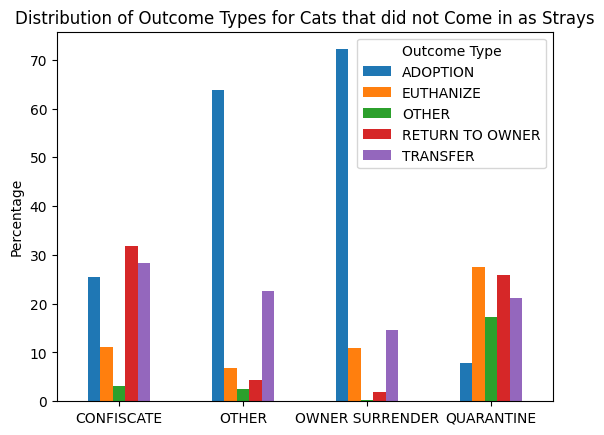

In [ ]:
(pd.crosstab(df_cat[df_cat['intake_type']!='STRAY']['intake_type'], df_cat['outcome_type'], normalize = 'index')*100).plot.bar(rot = 0)
plt.title('Distribution of Outcome Types for Cats that did not Come in as Strays')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title = "Outcome Type", bbox_to_anchor = (1,1));

Cats that came into the shelter when being surrendered or through other means were most likely to be adopted. However, confiscated cats were most likely to be returned to owner or adopted while quarantined cats were either euthanized or returned.

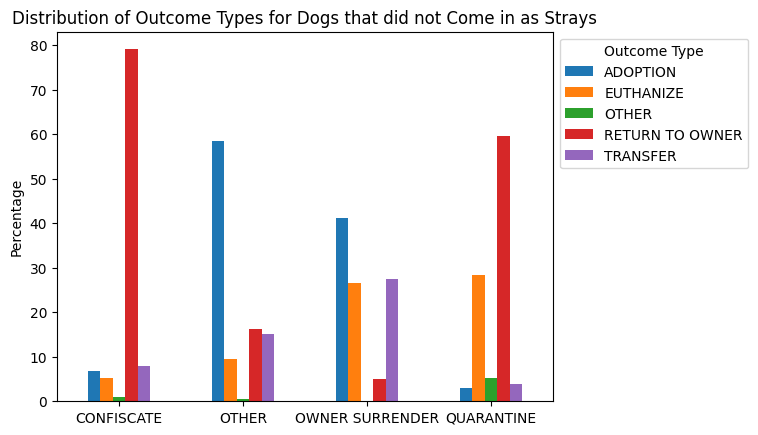

In [ ]:
(pd.crosstab(df_dog[df_dog['intake_type']!='STRAY']['intake_type'], df_dog['outcome_type'], normalize = 'index')*100).plot.bar(rot = 0)
plt.title('Distribution of Outcome Types for Dogs that did not Come in as Strays')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title = "Outcome Type", bbox_to_anchor = (1,1));

Most dogs that were confiscated or quarantined were returned to their owner at a higher amount than other outcome types. However, dogs that were surrendered or entered the shelter in other ways were most likely to be adopted.

# Conclusions

Through this report, we found that many animals within both species entered the shelter as strays. However, dogs were more likely to be confiscated than cats, while cats were more likely to be surrendered by the owner than dogs were. When it came to outcome types, a majority of dogs were returned to their owner, while cats were more likely to be adopted. When just stray animals were observed, it was found that cats were more likely to be adopted or transferred, whereas non-stray cats had a higher probability of being adopted. Since cats were not likely to be returned to their owner as strays, it is unlikely that many of them had previous homes or owners and could be wild or feral. However, there was very little difference in the distribution of outcome types for dogs that entered as strays and not as strays as they were both most likely returned to their owners. Stray dogs were extremely likely to be returned to owners, which could indicate that they escaped from their family homes. When looking at all other intake types than strays, it is observed that a majority of cats that were surrendered or entered the shelter through other means were adopted, while their outcome was not as clear when they were confiscated or quarantined. On the other hand, dogs that were confiscated or quarantined were more likely to be returned to their owner and were adopted if they were surrendered or entered by other means.